# Dask DataFrame

Материалы: 
* Макрушин С.В. Лекция 13: Dask DataFrame
* https://docs.dask.org/en/latest/dataframe.html
* JESSE C. DANIEL. Data Science with Python and Dask. 

## Задачи для совместного разбора

1. Считать данные из файлов в каталоге `accounts`. Содержат ли какие-либо из столбцов пропуски?

2. Подсчитать количество раз, которое то или иное имя встретилось в выборке. Вывести самое часто встречающееся имя.

3. Создать новую колонку, которая является результатом от деления значения `amount` нацело на 100, если `amount` > 100, и нулём в противном случае.

## Лабораторная работа 13

In [1]:
import dask.dataframe as dd
import pandas as pd
import dask.bag as db
import json
import dask

1. В архиве `recipes_full.zip` находятся файлы, содержащие информацию об рецептах блюд. Загрузите данные из файлов этого архива в виде `dd.DataFrame` с названием `recipes`. Укажите, что в столбце `submitted` содержатся даты.

In [2]:
recipes = dd.read_csv('data/recipes_full/recipes_full_*.csv')
recipes.head()

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,683970,vant ivoire mickies nothing,33,803776,2019-08-22,4,pat and gina neely and their family own and op...,9
1,1089012,kremsils mariposa baccala cookies class borage...,23,51579,2013-03-02,1,"a light, tasty and easy to put together chicke...",5
2,1428572,tania lander,0,68884,1980-11-09,1,a delicious melt in your mouth appetizer. for ...,5
3,1400250,heloise milli asher doogh zojirushi,24,678862,2018-04-29,3,delicious cream cheese and peach filled cresce...,1
4,387709,nutty chocolate chunk cookies,47,489552,2009-08-31,8,everyone loves these buttery cookies chock ful...,10


In [3]:
recipes['submitted'] = dd.to_datetime(recipes['submitted'])

2. Выведите метаинформацию о таблице: `npartitions` и типы столбцов.

In [4]:
recipes.npartitions

16

In [5]:
recipes.dtypes

id                         int64
name                      object
minutes                    int64
contributor_id             int64
submitted         datetime64[ns]
n_steps                    int64
description               object
n_ingredients              int64
dtype: object

3. Выведите на экран 5 первых строк таблицы. Выведите на экран 5 последних строк таблицы. В случае сообщения об ошибки объясните причину и исправьте ошибку.

In [20]:
recipes.head(5)

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,683970,vant ivoire mickies nothing,33,803776,2019-08-22,4,pat and gina neely and their family own and op...,9
1,1089012,kremsils mariposa baccala cookies class borage...,23,51579,2013-03-02,1,"a light, tasty and easy to put together chicke...",5
2,1428572,tania lander,0,68884,1980-11-09,1,a delicious melt in your mouth appetizer. for ...,5
3,1400250,heloise milli asher doogh zojirushi,24,678862,2018-04-29,3,delicious cream cheese and peach filled cresce...,1
4,387709,nutty chocolate chunk cookies,47,489552,2009-08-31,8,everyone loves these buttery cookies chock ful...,10


In [21]:
recipes.tail(5)

ValueError: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+---------+---------+----------+
| Column  | Found   | Expected |
+---------+---------+----------+
| minutes | float64 | int64    |
| n_steps | float64 | int64    |
+---------+---------+----------+

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'minutes': 'float64',
       'n_steps': 'float64'}

to the call to `read_csv`/`read_table`.

Alternatively, provide `assume_missing=True` to interpret
all unspecified integer columns as floats.

Ошибка из-за того, что типы данных столбоц, которые были назначены автоматически (по первым объектам) не соответствуют типам, которые встречаются далее

In [6]:
recipes[['n_steps', 'minutes']] = recipes[['n_steps', 'minutes']].astype('float64')
recipes.dtypes

id                         int64
name                      object
minutes                  float64
contributor_id             int64
submitted         datetime64[ns]
n_steps                  float64
description               object
n_ingredients              int64
dtype: object

In [4]:
recipes_n = dd.read_csv('data/recipes_full/recipes_full_*.csv', assume_missing=True)
recipes_n['submitted'] = dd.to_datetime(recipes_n['submitted'])

In [32]:
recipes_n.head(5)

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,683970.0,vant ivoire mickies nothing,33.0,803776.0,2019-08-22,4.0,pat and gina neely and their family own and op...,9.0
1,1089012.0,kremsils mariposa baccala cookies class borage...,23.0,51579.0,2013-03-02,1.0,"a light, tasty and easy to put together chicke...",5.0
2,1428572.0,tania lander,0.0,68884.0,1980-11-09,1.0,a delicious melt in your mouth appetizer. for ...,5.0
3,1400250.0,heloise milli asher doogh zojirushi,24.0,678862.0,2018-04-29,3.0,delicious cream cheese and peach filled cresce...,1.0
4,387709.0,nutty chocolate chunk cookies,47.0,489552.0,2009-08-31,8.0,everyone loves these buttery cookies chock ful...,10.0


In [31]:
recipes_n.tail(5)

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
44011,1029131.0,tuti waffle snackies steakhouse,19.0,171345.0,1973-10-18,4.0,"according to a providence journal article, ama...",4.0
44012,1700703.0,noelias cheats crocante fleisch zitumbuwa,1.0,30228.0,2007-07-01,6.0,if possible sauté the onions and garlic in abo...,1.0
44013,1910650.0,rubbed restuffed pelmeni bedouin flavourful,60.0,591905.0,2009-09-26,3.0,another great recipe to add to the growing swe...,2.0
44014,713836.0,stems polpettine peezi,NaN,357389.0,2003-09-30,4.0,adapted from top secret recipes. love this!,9.0
44015,660699.0,clementines,64.0,29196.0,1973-06-03,6.0,this would make a great start to your holiday ...,8.0


4. Посчитайте, сколько строк содержит каждый из блоков

In [34]:
recipes_n.map_partitions(len).compute()

0     237505
1      41450
2     235222
3      43733
4     238139
5      40816
6     234750
7      44205
8     237887
9      41068
10    234486
11     44468
12    238298
13     40656
14    234938
15     44016
dtype: int64

5. Найдите максимум в столбце `n_steps`. Визуализируйте граф вычислений для этой задачи. Прокомментируйте логику работы `dask` в этом случае.

In [8]:
recipes_n['n_steps'].max().compute()

145.0

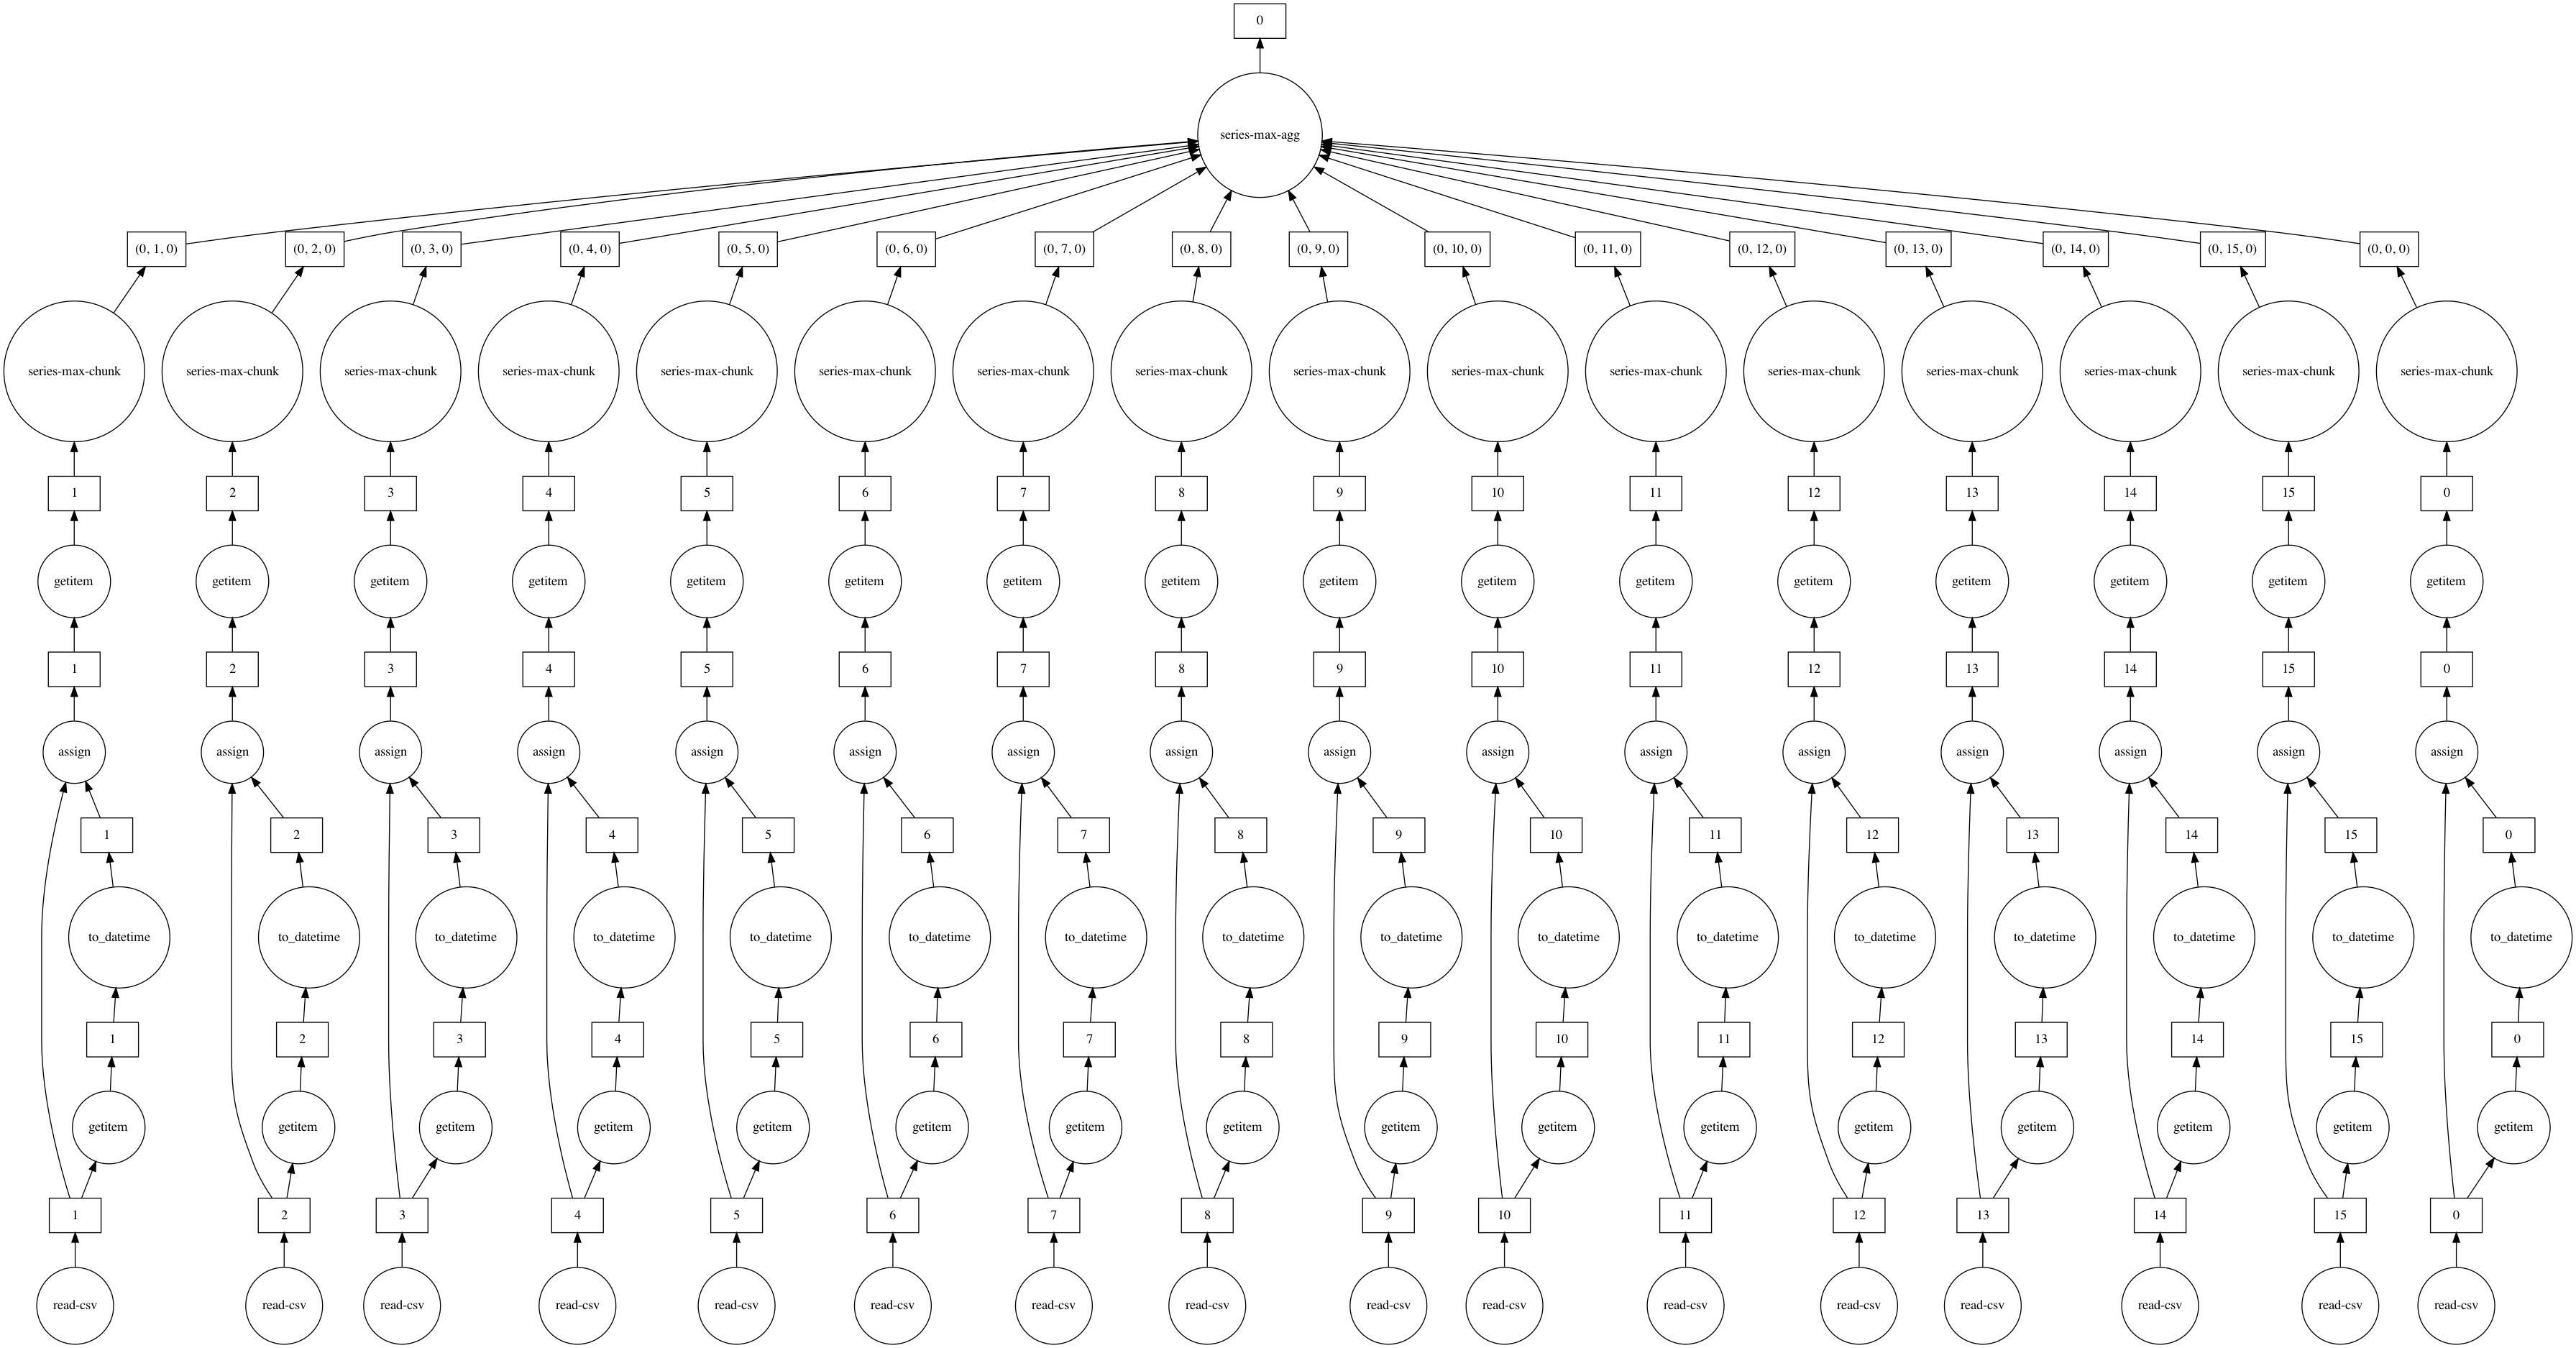

In [5]:
recipes_n['n_steps'].max().visualize()

6. Посчитайте количество отзывов с группировкой по месяцам добавления отзыва в базу.

In [24]:
recipes_rev_size = recipes_n.groupby(recipes_n['submitted'].dt.month).size().compute()

In [25]:
recipes_rev_size

submitted
1     193363
2     173834
3     192389
4     186049
5     192487
6     184205
7     189337
8     187276
9     181081
10    187018
11    180974
12    183624
dtype: int64

7. Считайте файлы из архива `reviews_full.zip` (__ЛР12__) в виде `dask.bag`. Пользуясь результатом лабораторной работы 12, рассчитайте среднее значение оценок отзывов с группировкой по месяцам. После завершения всех вычислений преобразуйте результат к `pd.Series`.

In [13]:
import re

def con_star(json_s, rating):
    json_d = json.loads(json_s)
    json_d['rating'] = int(re.search(r'(reviews_)\d', rating).group()[-1])
    return json_d

data_r = db.read_text('data/reviews_full/reviews_*.json', include_path = True)
data_n = data_r.starmap(con_star)

In [96]:
data_n.take(3)

({'user_id': 452355,
  'recipe_id': 292657,
  'date': '2016-05-08',
  'review': 'WOW!!! This is the best. I have never been able to make homemade enchiladas that taste like the Mexican restaurants. I made this last night for my family and they said they will never have enchiladas at the Mexican Restaurants again. Thanks for sharing.',
  'rating': 0},
 {'user_id': 329304,
  'recipe_id': 433404,
  'date': '2006-06-14',
  'review': 'This was good but the dressing needed something and I found it to be a little too sweet, next time I will experiment with some garlic and herbs and reduce the sugar slightly, thanks for sharing kcdlong!...Kitten',
  'rating': 0},
 {'user_id': 227932,
  'recipe_id': 2008187,
  'date': '1985-11-19',
  'review': 'Very good,it was a hit for my family. I used 6 cloves of garlic and had 1 lb beef and  Johnsonville sausage,1/2 lb hot and  1/2 lb honey garlic( which I wanted to use). That was a perfect combo for us. The sausage gave it nice flavor No guestion , I will

In [18]:
df_data = data_n.to_dataframe()
df_data['date'] = dd.to_datetime(df_data['date'])
df_data.head(3)

,user_id,recipe_id,date,review,rating
0,452355,292657,2016-05-08,WOW!!! This is the best. I have never been abl...,0
1,329304,433404,2006-06-14,This was good but the dressing needed somethin...,0
2,227932,2008187,1985-11-19,"Very good,it was a hit for my family. I used 6...",0


In [21]:
data_mean = df_data.groupby(df_data['date'].dt.month)['rating'].mean().compute()

In [22]:
data_mean

date
1     4.408553
2     4.407135
3     4.406911
4     4.412259
5     4.415401
6     4.418419
7     4.411717
8     4.410822
9     4.410661
10    4.411452
11    4.408829
12    4.406908
Name: rating, dtype: float64

In [23]:
type(data_mean)

pandas.core.series.Series

8. Пользуясь результатами решения задач 6 и 7, создайте `pd.DataFrame`, содержащий два столбца: `mean_rating`, `recipes_count`

In [31]:
res = pd.concat([data_mean, recipes_rev_size], axis=1)
res.columns = ['mean_rating', 'recipes_count']
res

,mean_rating,recipes_count
1,4.408553,193363
2,4.407135,173834
3,4.406911,192389
4,4.412259,186049
5,4.415401,192487
6,4.418419,184205
7,4.411717,189337
8,4.410822,187276
9,4.410661,181081
10,4.411452,187018
